In [1]:
from collections import defaultdict, Counter
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
data = \
[[['аксюша', 'карп'],
  ['аксюша', 'буланов', 'карп', 'улита'],
  ['буланов', 'карп', 'улита'],
  ['бодаев', 'буланов', 'гурмыжская', 'карп', 'милонов'],
  ['бодаев', 'восмибратов', 'гурмыжская', 'милонов', 'петр'],
  ['восмибратов', 'гурмыжская', 'петр'],
  ['аксюша', 'гурмыжская', 'карп', 'улита'],
  ['гурмыжская', 'улита']],
 [['аксюша', 'петр'], ['несчастливцев', 'счастливцев']],
 [['буланов', 'гурмыжская'],
  ['буланов', 'гурмыжская', 'карп'],
  ['несчастливцев', 'счастливцев'],
  ['карп', 'несчастливцев', 'счастливцев'],
  ['восмибратов', 'карп', 'петр'],
  ['буланов', 'несчастливцев'],
  ['буланов', 'гурмыжская', 'карп', 'несчастливцев'],
  ['восмибратов', 'гурмыжская', 'петр'],
  ['буланов', 'гурмыжская', 'карп', 'несчастливцев', 'счастливцев'],
  ['буланов', 'восмибратов', 'карп', 'несчастливцев', 'петр', 'счастливцев'],
  ['буланов', 'восмибратов', 'гурмыжская', 'карп', 'несчастливцев', 'петр', 'счастливцев'],
  ['буланов', 'гурмыжская', 'счастливцев']],
 [['несчастливцев', 'счастливцев'],
  ['карп', 'улита'],
  ['карп', 'счастливцев', 'улита'],
  ['счастливцев', 'улита'],
  ['аксюша', 'петр'],
  ['аксюша', 'несчастливцев', 'счастливцев'],
  ['гурмыжская', 'улита'],
  ['буланов', 'гурмыжская']],
 [['буланов', 'карп'],
  ['буланов', 'несчастливцев'],
  ['буланов', 'гурмыжская'],
  ['аксюша', 'гурмыжская', 'карп'],
  ['гурмыжская', 'карп', 'несчастливцев'],
  ['несчастливцев', 'счастливцев'],
  ['аксюша', 'несчастливцев', 'петр'],
  ['бодаев', 'буланов', 'гурмыжская', 'карп', 'милонов'],
  ['аксюша', 'бодаев', 'буланов', 'восмибратов', 'гурмыжская', 'карп', 'милонов', 'несчастливцев', 'петр', 'счастливцев']]]

## Матрица

In [3]:
drama_heroes = [hero for act in data for scene in act for hero in scene]
drama_heroes = list(sorted(set(drama_heroes)))
matrices = [np.array([[1 if hero in scene else 0 for scene in act] for hero in drama_heroes]) for act in data]

In [4]:
def rome(dec):
    return {1: 'I', 2: 'II', 3: 'III', 4: 'IV', 5: 'V', 6: 'VI'}[dec]

def col(act, scene):
    return rome(act) + '.' + str(scene)

def cols():
    return [col(n_act+1, n_scene+1) for n_act, act in enumerate(matrices) for n_scene in range(len(act[0]))]

matrix = np.hstack(matrices)
pd.DataFrame(matrix, index=drama_heroes, columns=cols())

,I.1,I.2,I.3,I.4,I.5,I.6,I.7,I.8,II.1,II.2,III.1,III.2,III.3,III.4,III.5,III.6,III.7,III.8,III.9,III.10,III.11,III.12,IV.1,IV.2,IV.3,IV.4,IV.5,IV.6,IV.7,IV.8,V.1,V.2,V.3,V.4,V.5,V.6,V.7,V.8,V.9
аксюша,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1
бодаев,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
буланов,0,1,1,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,1,1,1,1,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1
восмибратов,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
гурмыжская,0,0,0,1,1,1,1,1,0,0,1,1,0,0,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,1,1
карп,1,1,1,1,0,0,1,0,0,0,0,1,0,1,1,0,1,0,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,1
милонов,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
несчастливцев,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,1,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,1,0,1
петр,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
счастливцев,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,1,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,1


## Мобильность

In [5]:
def mob(mat):
    return (np.sum(np.abs(mat[:, 1:] - mat[:, :-1]), axis=1) - 1) / (len(mat[0])-1)

index = list(range(1, len(matrices) + 1)) + ['пьеса']
mobility = list(map(mob, matrices + [matrix]))
mobility = pd.DataFrame(mobility, index=index, columns=drama_heroes).round(2).transpose()
mobility[mobility < 0] = ''
mobility

,1,2,3,4,5,пьеса
аксюша,0.29,0,,0.14,0.5,0.29
бодаев,0.14,,,,0,0.05
буланов,0.14,,0.27,0,0.12,0.26
восмибратов,0.14,,0.45,,0,0.21
гурмыжская,0,,0.27,0,0.25,0.32
карп,0.29,,0.64,0.14,0.38,0.45
милонов,0.14,,,,0,0.05
несчастливцев,,0,0.45,0.29,0.5,0.42
петр,0.14,0,0.45,0.14,0.25,0.37
счастливцев,,0,0.18,0.57,0.25,0.32


## Плотность

In [6]:
def dens(matrix):
#     print(np.count_nonzero(matrix), '/', matrix.size, sep='', end=', ')
    return np.count_nonzero(matrix)/matrix.size

In [7]:
print('Плотность всей пьесы:', round(dens(matrix), 2))

act_d = list(map(dens, matrices))
act_d_ = np.array(act_d).reshape(-1, 1)
scene_d = [[dens(c) for c in m.T] for m in matrices]
scene_d_ = pd.DataFrame(scene_d).values # to fill with nans
columns = list(range(1, len(scene_d_[0]) + 1)) + ['действия']
density = pd.DataFrame(np.hstack((scene_d_, act_d_)), columns=columns)
density.round(2).fillna('')

Плотность всей пьесы: 0.29


,1,2,3,4,5,6,7,8,9,10,11,12,действия
0,0.18,0.36,0.27,0.45,0.45,0.27,0.36,0.18,,,,,0.32
1,0.18,0.18,,,,,,,,,,,0.18
2,0.18,0.27,0.18,0.27,0.27,0.18,0.36,0.27,0.45,0.55,0.64,0.27,0.33
3,0.18,0.18,0.27,0.18,0.18,0.27,0.18,0.18,,,,,0.20
4,0.18,0.18,0.18,0.27,0.27,0.18,0.27,0.45,0.91,,,,0.32


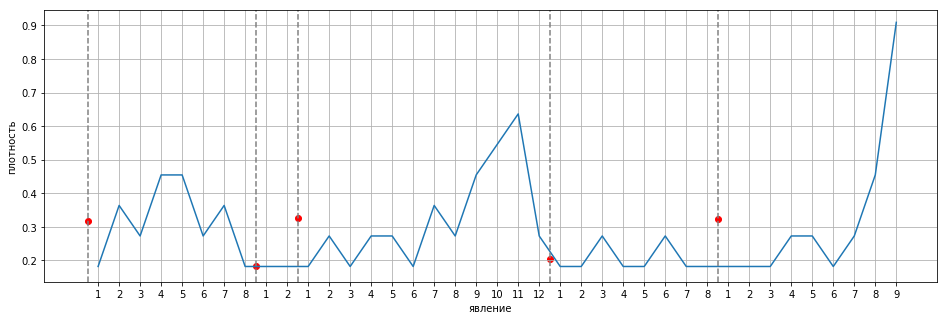

In [8]:
from itertools import accumulate

plt.subplots(figsize=(16, 5));

flat = [tup for act in scene_d for tup in enumerate(act, start=1)]
ticks, values = zip(*flat)
plt.plot(values);
plt.xticks(range(len(ticks)), ticks);

borders = np.array(list(accumulate(map(len, [[]] + scene_d))))
plt.scatter(borders[:-1]-0.5, act_d, c='red');
for x in borders[:-1]:
    plt.axvline(x-0.5, c='gray', ls='--');
    
plt.xlabel('явление');
plt.ylabel('плотность');
plt.grid();

## Расстояние

In [9]:
def dist(mat):
    n = len(drama_heroes)
    dist = np.zeros((n, n))*np.nan
    for i in range(n-1):
        for j in range(i+1, n):
            if np.sum(mat[i]) != 0 and np.sum(mat[j]) != 0:
                dist[i][j] = dist[j][i] = np.sum(np.abs(mat[i] - mat[j]))
    return dist/len(mat[0])

In [10]:
act_d = [dist(m) for m in matrices]
drama_d = dist(matrix)

In [11]:
distances = [pd.DataFrame(d, index=drama_heroes, columns=drama_heroes).stack() for d in act_d + [drama_d]]
distances = pd.concat(distances, axis=1)
distances.columns = list(range(1, len(act_d) + 1)) + ['пьеса']
distances.round(2).fillna('')

1  2     3     4     5  пьеса
аксюша        бодаев         0.62                 0.33   0.28
              буланов         0.5           0.38  0.67   0.56
              восмибратов    0.62                 0.22   0.36
              гурмыжская     0.75            0.5  0.44   0.56
              карп           0.25            0.5  0.44   0.46
              милонов        0.62                 0.33   0.28
              несчастливцев        1        0.25  0.44   0.46
              петр           0.62  0        0.12  0.11   0.28
              счастливцев          1         0.5  0.33   0.46
              улита          0.38           0.75         0.33
бодаев        аксюша         0.62                 0.33   0.28
              буланов        0.38                 0.33   0.38
              восмибратов    0.25                 0.11   0.18
              гурмыжская     0.38                 0.33   0.38
              карп           0.62                 0.33   0.44
              милонов           0                    0   0.00
              несчастливцев                       0.56   0.44
              петр           0.25                 0.22   0.26
              счастливцев                         0.22   0.38
              улита          0.75                        0.31
буланов       аксюша          0.5           0.38  0.67   0.56
              бодаев         0.38                 0.33   0.38
              восмибратов    0.62     0.67        0.44   0.46
              гурмыжская     0.75     0.25  0.12  0.44   0.36
              карп           0.25     0.42  0.38  0.44   0.36
              милонов        0.38                 0.33   0.38
              несчастливцев           0.42  0.38  0.67   0.46
              петр           0.62     0.67  0.25  0.56   0.54
              счастливцев              0.5  0.62  0.56   0.51
              улита          0.38           0.62         0.54
восмибратов   аксюша         0.62                 0.22   0.36
              бодаев         0.25                 0.11   0.18
              буланов        0.62     0.67        0.44   0.46
              гурмыжская     0.38     0.58        0.44   0.41
              карп           0.88     0.42        0.44   0.46
              милонов        0.25                 0.11   0.18
              несчастливцев           0.58        0.44   0.41
              петр              0        0        0.11   0.08
              счастливцев              0.5        0.11   0.36
              улита          0.75                        0.38
гурмыжская    аксюша         0.75            0.5  0.44   0.56
              бодаев         0.38                 0.33   0.38
              буланов        0.75     0.25  0.12  0.44   0.36
              восмибратов    0.38     0.58        0.44   0.41
              карп           0.75      0.5   0.5  0.22   0.46
              милонов        0.38                 0.33   0.38
              несчастливцев           0.67   0.5  0.67   0.62
              петр           0.38     0.58  0.38  0.56   0.49
              счастливцев             0.58  0.75  0.56   0.62
              улита          0.62            0.5         0.54
карп          аксюша         0.25            0.5  0.44   0.46
              бодаев         0.62                 0.33   0.44
              буланов        0.25     0.42  0.38  0.44   0.36
              восмибратов    0.88     0.42        0.44   0.46
              гурмыжская     0.75      0.5   0.5  0.22   0.46
              милонов        0.62                 0.33   0.44
              несчастливцев           0.33   0.5  0.67   0.51
              петр           0.88     0.42  0.38  0.56   0.54
              счастливцев             0.42   0.5  0.56   0.51
              улита          0.38           0.25         0.44
милонов       аксюша         0.62                 0.33   0.28
              бодаев            0                    0   0.00
              буланов        0.38                 0.33   0.38
              восмибратов    0.25                 0.11   0.18
  

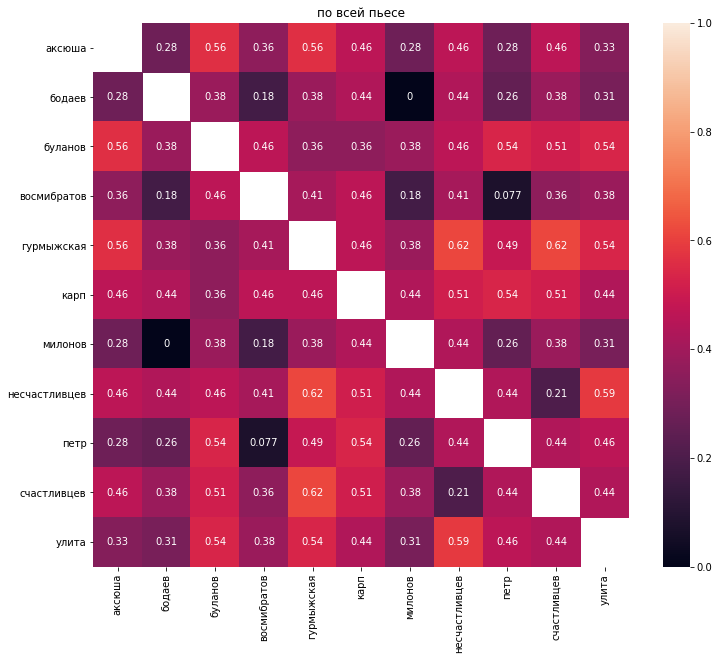

In [12]:
plt.subplots(figsize=(12, 10))
sns.heatmap(drama_d, vmin=0, vmax=1, annot=True, xticklabels=drama_heroes, yticklabels=drama_heroes)
plt.title('по всей пьесе');

## Абстрактные типы отношений (= соп., <> альт., > или < дом.)

In [13]:
for i, j in zip(*np.where(drama_d == 0)):
    if i != j and i < j:
        p = np.sum(matrix[i])
        q = np.sum(matrix[j])
        s = '=' if p == q else ('>' if p > q else '<')
        print(drama_heroes[i], s, drama_heroes[j])

бодаев = милонов


## Ранг

In [14]:
rank = [np.sum(np.sum(matrix, axis=0)[np.where(matrix[i] != 0)[0]] - 1) for i in range(len(drama_heroes))]
df = pd.DataFrame(dict(zip(drama_heroes, rank)), index=['ранг']).sort_values(by='ранг', axis=1, ascending=False)

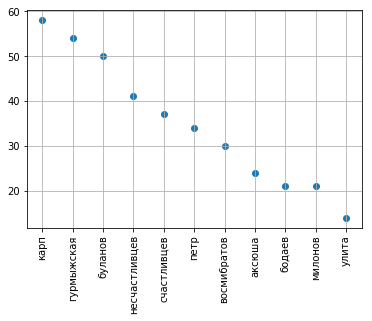

In [15]:
plt.scatter(range(len(drama_heroes)), df.values);
plt.xticks(range(len(drama_heroes)), df.columns, rotation=90);
plt.grid();

## Абсолютные относительные частоты

In [26]:
def freq(mat):
    return np.sum(mat, axis=1)/len(mat[0])

index = list(range(1, len(matrices) + 1)) + ['пьеса']
freq_abs = list(map(freq, matrices + [matrix]))
freq_abs = pd.DataFrame(freq_abs, index=index, columns=drama_heroes).transpose()
freq_abs[freq_abs == 0] = np.nan
freq_abs.round(2).fillna('').sort_values(by='пьеса', ascending=False)

,1,2,3,4,5,пьеса
гурмыжская,0.62,,0.58,0.25,0.56,0.49
карп,0.62,,0.58,0.25,0.56,0.49
буланов,0.38,,0.67,0.12,0.56,0.44
несчастливцев,,0.5,0.58,0.25,0.56,0.38
счастливцев,,0.5,0.5,0.5,0.22,0.33
петр,0.25,0.5,0.33,0.12,0.22,0.26
аксюша,0.38,0.5,,0.25,0.33,0.23
улита,0.5,,,0.5,,0.21
восмибратов,0.25,,0.33,,0.11,0.18
бодаев,0.25,,,,0.22,0.10


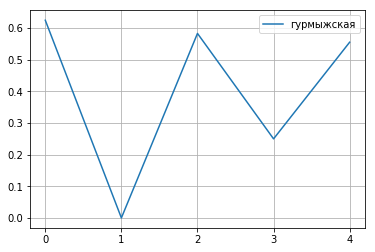

In [28]:
fig, ax = plt.subplots();
for freq_, name in zip(freq_abs.fillna(0).values, drama_heroes):
    if name == 'гурмыжская':
        ax.plot(freq_[:-1], label=name);
ax.set_xticks([0, 1, 2, 3, 4]);
plt.grid()
plt.legend();

## Условные относительные частоты

In [29]:
def rel_freq(mat):
    busyness = np.sum(mat, axis=1)
    freq_rel = np.zeros((len(drama_heroes), len(drama_heroes)))
    for i in range(len(mat)):
        for j in range(len(mat)):
            if busyness[j] == 0:
                freq_rel[i, j] = np.nan
            else:
                freq_rel[i, j] = np.count_nonzero(mat[i] + mat[j] - 2 == 0)/busyness[j]
    return freq_rel

for i, m in enumerate(matrices):
    print('Действие', i+1)
    pd.DataFrame(rel_freq(m), index=drama_heroes, columns=drama_heroes).round(2)
    
print('По всей пьесе')
pd.DataFrame(rel_freq(matrix), index=drama_heroes, columns=drama_heroes).round(2)

Действие 1


,аксюша,бодаев,буланов,восмибратов,гурмыжская,карп,милонов,несчастливцев,петр,счастливцев,улита
аксюша,1.00,0.0,0.33,0.0,0.2,0.6,0.0,NaN,0.0,NaN,0.50
бодаев,0.00,1.0,0.33,0.5,0.4,0.2,1.0,NaN,0.5,NaN,0.00
буланов,0.33,0.5,1.00,0.0,0.2,0.6,0.5,NaN,0.0,NaN,0.50
восмибратов,0.00,0.5,0.00,1.0,0.4,0.0,0.5,NaN,1.0,NaN,0.00
гурмыжская,0.33,1.0,0.33,1.0,1.0,0.4,1.0,NaN,1.0,NaN,0.50
карп,1.00,0.5,1.00,0.0,0.4,1.0,0.5,NaN,0.0,NaN,0.75
милонов,0.00,1.0,0.33,0.5,0.4,0.2,1.0,NaN,0.5,NaN,0.00
несчастливцев,0.00,0.0,0.00,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.00
петр,0.00,0.5,0.00,1.0,0.4,0.0,0.5,NaN,1.0,NaN,0.00
счастливцев,0.00,0.0,0.00,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.00


Действие 2


,аксюша,бодаев,буланов,восмибратов,гурмыжская,карп,милонов,несчастливцев,петр,счастливцев,улита
аксюша,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,NaN
бодаев,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN
буланов,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN
восмибратов,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN
гурмыжская,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN
карп,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN
милонов,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN
несчастливцев,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,NaN
петр,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,NaN
счастливцев,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,NaN


Действие 3


,аксюша,бодаев,буланов,восмибратов,гурмыжская,карп,милонов,несчастливцев,петр,счастливцев,улита
аксюша,NaN,NaN,0.00,0.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN
бодаев,NaN,NaN,0.00,0.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN
буланов,NaN,NaN,1.00,0.50,0.86,0.71,NaN,0.71,0.50,0.67,NaN
восмибратов,NaN,NaN,0.25,1.00,0.29,0.43,NaN,0.29,1.00,0.33,NaN
гурмыжская,NaN,NaN,0.75,0.50,1.00,0.57,NaN,0.43,0.50,0.50,NaN
карп,NaN,NaN,0.62,0.75,0.57,1.00,NaN,0.71,0.75,0.67,NaN
милонов,NaN,NaN,0.00,0.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN
несчастливцев,NaN,NaN,0.62,0.50,0.43,0.71,NaN,1.00,0.50,0.83,NaN
петр,NaN,NaN,0.25,1.00,0.29,0.43,NaN,0.29,1.00,0.33,NaN
счастливцев,NaN,NaN,0.50,0.50,0.43,0.57,NaN,0.71,0.50,1.00,NaN


Действие 4


,аксюша,бодаев,буланов,восмибратов,гурмыжская,карп,милонов,несчастливцев,петр,счастливцев,улита
аксюша,1.0,NaN,0.0,NaN,0.0,0.0,NaN,0.5,1.0,0.25,0.00
бодаев,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.00,0.00
буланов,0.0,NaN,1.0,NaN,0.5,0.0,NaN,0.0,0.0,0.00,0.00
восмибратов,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.00,0.00
гурмыжская,0.0,NaN,1.0,NaN,1.0,0.0,NaN,0.0,0.0,0.00,0.25
карп,0.0,NaN,0.0,NaN,0.0,1.0,NaN,0.0,0.0,0.25,0.50
милонов,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.00,0.00
несчастливцев,0.5,NaN,0.0,NaN,0.0,0.0,NaN,1.0,0.0,0.50,0.00
петр,0.5,NaN,0.0,NaN,0.0,0.0,NaN,0.0,1.0,0.00,0.00
счастливцев,0.5,NaN,0.0,NaN,0.0,0.5,NaN,1.0,0.0,1.00,0.50


Действие 5


,аксюша,бодаев,буланов,восмибратов,гурмыжская,карп,милонов,несчастливцев,петр,счастливцев,улита
аксюша,1.00,0.5,0.2,1.0,0.4,0.4,0.5,0.4,1.0,0.5,NaN
бодаев,0.33,1.0,0.4,1.0,0.4,0.4,1.0,0.2,0.5,0.5,NaN
буланов,0.33,1.0,1.0,1.0,0.6,0.6,1.0,0.4,0.5,0.5,NaN
восмибратов,0.33,0.5,0.2,1.0,0.2,0.2,0.5,0.2,0.5,0.5,NaN
гурмыжская,0.67,1.0,0.6,1.0,1.0,0.8,1.0,0.4,0.5,0.5,NaN
карп,0.67,1.0,0.6,1.0,0.8,1.0,1.0,0.4,0.5,0.5,NaN
милонов,0.33,1.0,0.4,1.0,0.4,0.4,1.0,0.2,0.5,0.5,NaN
несчастливцев,0.67,0.5,0.4,1.0,0.4,0.4,0.5,1.0,1.0,1.0,NaN
петр,0.67,0.5,0.2,1.0,0.2,0.2,0.5,0.4,1.0,0.5,NaN
счастливцев,0.33,0.5,0.2,1.0,0.2,0.2,0.5,0.4,0.5,1.0,NaN


По всей пьесе


,аксюша,бодаев,буланов,восмибратов,гурмыжская,карп,милонов,несчастливцев,петр,счастливцев,улита
аксюша,1.00,0.25,0.12,0.14,0.16,0.26,0.25,0.20,0.4,0.15,0.25
бодаев,0.11,1.00,0.18,0.29,0.21,0.16,1.00,0.07,0.2,0.08,0.00
буланов,0.22,0.75,1.00,0.43,0.58,0.58,0.75,0.47,0.3,0.38,0.25
восмибратов,0.11,0.50,0.18,1.00,0.26,0.21,0.50,0.20,0.7,0.23,0.00
гурмыжская,0.33,1.00,0.65,0.71,1.00,0.53,1.00,0.33,0.5,0.31,0.38
карп,0.56,0.75,0.65,0.57,0.53,1.00,0.75,0.47,0.4,0.46,0.62
милонов,0.11,1.00,0.18,0.29,0.21,0.16,1.00,0.07,0.2,0.08,0.00
несчастливцев,0.33,0.25,0.41,0.43,0.26,0.37,0.25,1.00,0.4,0.77,0.00
петр,0.44,0.50,0.18,1.00,0.26,0.21,0.50,0.27,1.0,0.23,0.00
счастливцев,0.22,0.25,0.29,0.43,0.21,0.32,0.25,0.67,0.3,1.00,0.25


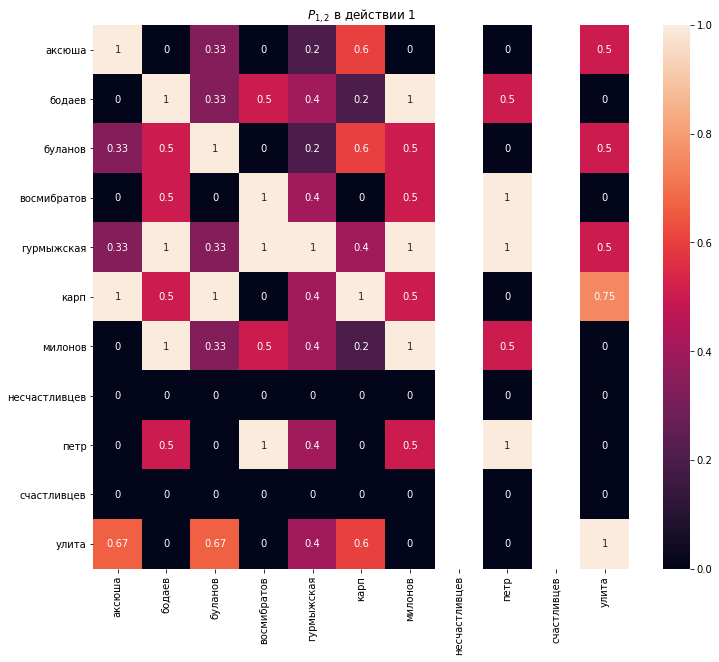

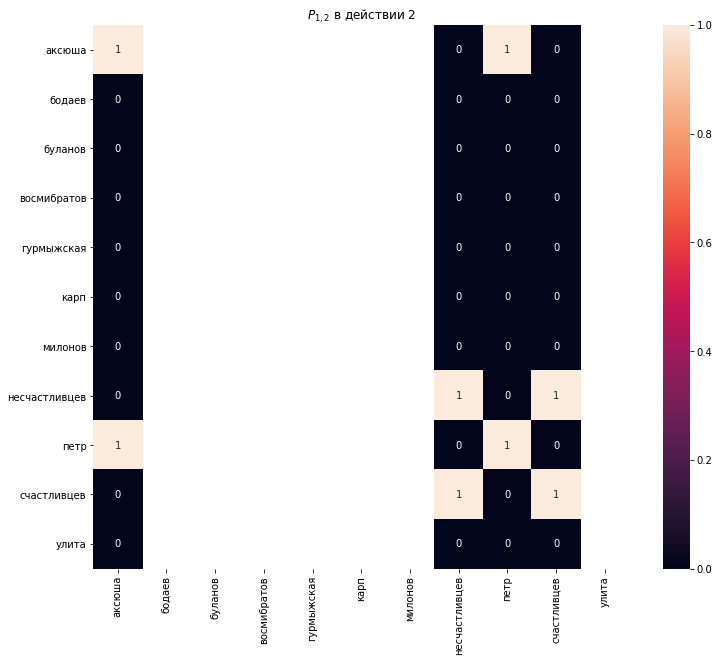

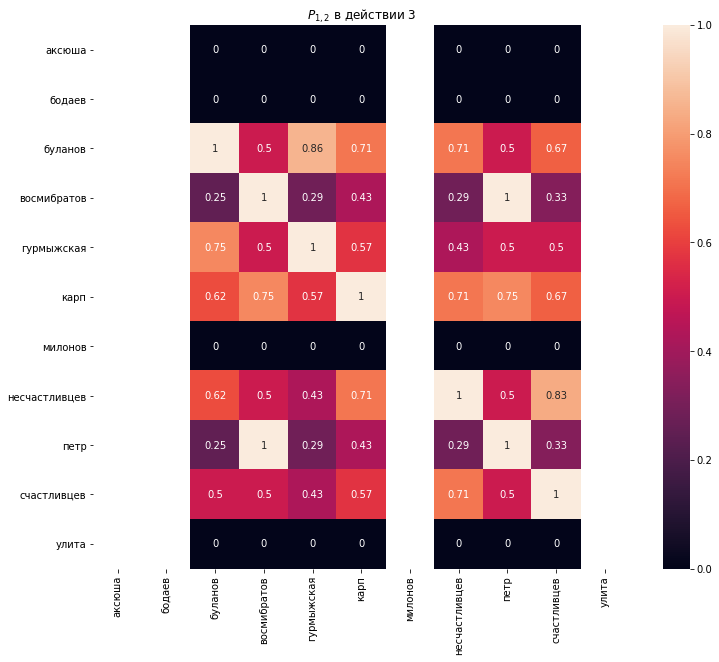

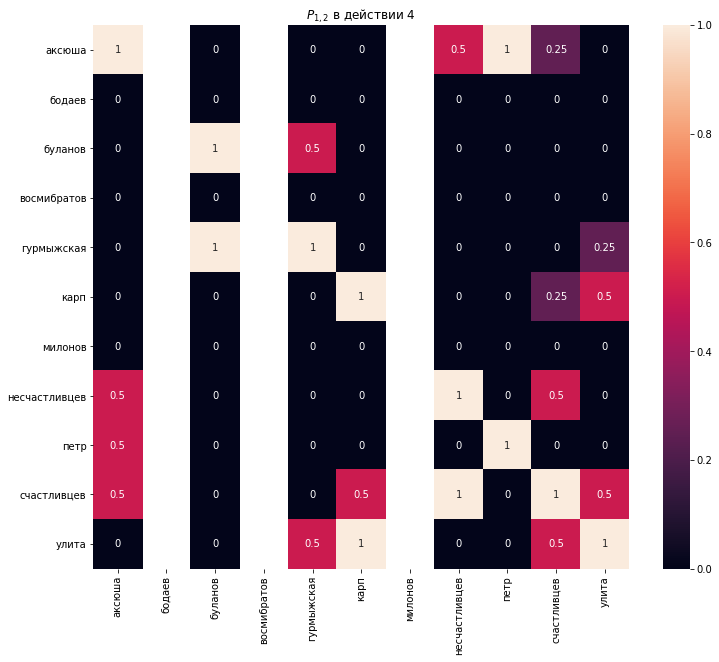

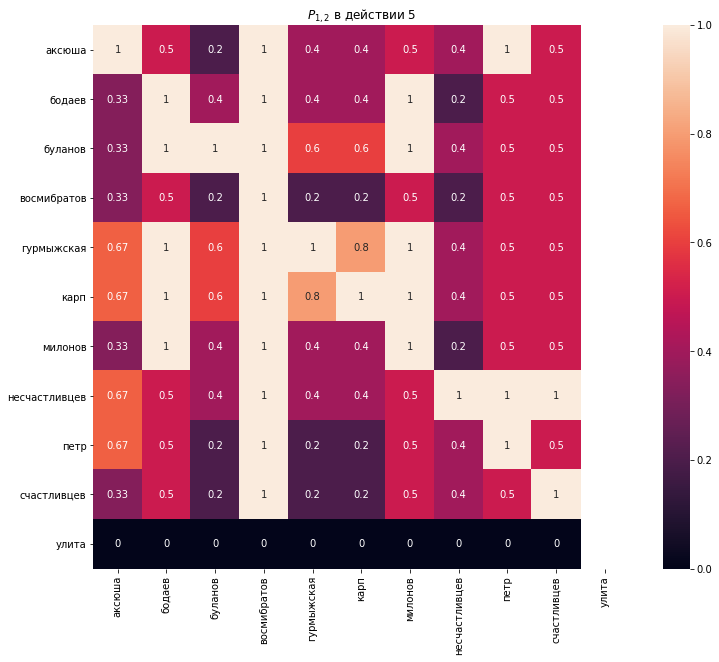

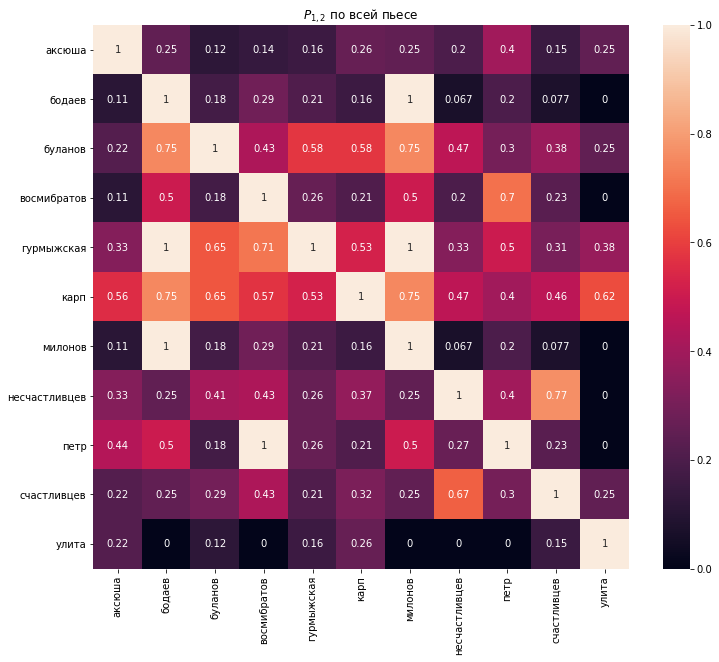

In [30]:
for i, m in enumerate(matrices):
    plt.subplots(figsize=(12, 10))
    sns.heatmap(rel_freq(m), vmin=0, vmax=1, annot=True, xticklabels=drama_heroes, yticklabels=drama_heroes)
    plt.title(r"$P_{1,2}$ в действии " + str(i+1));

plt.subplots(figsize=(12, 10))
sns.heatmap(rel_freq(matrix), vmin=0, vmax=1, annot=True, xticklabels=drama_heroes, yticklabels=drama_heroes)
plt.title(r"$P_{1,2}$ по всей пьесе");

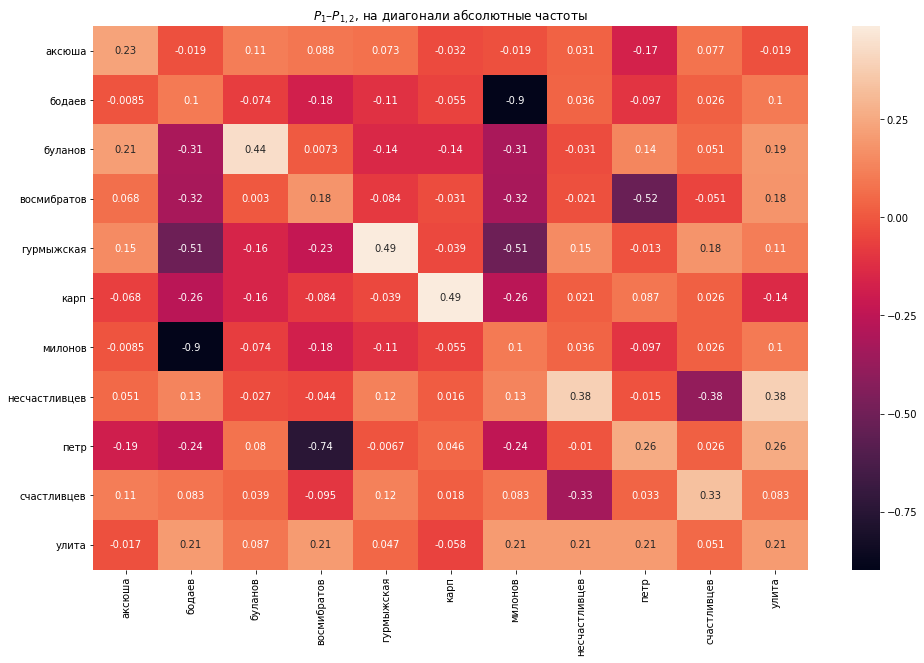

In [31]:
freq_abs = freq(matrix).reshape((-1, 1))
freq_rel = rel_freq(matrix)
freq_ = freq_abs - freq_rel
freq_[np.diag_indices(len(freq_[0]))] = freq_abs.ravel()
plt.subplots(figsize=(16, 10))
sns.heatmap(freq_, annot=True, xticklabels=drama_heroes, yticklabels=drama_heroes)
plt.title(r"$P_1 – P_{1,2}$, на диагонали абсолютные частоты");